In [2]:
import owm
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:37:41) 
[Clang 10.0.1 ]


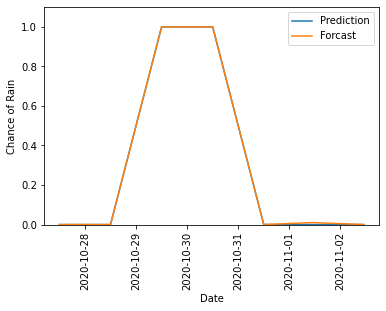

In [3]:
def load_models():
    v = 5
    vote = pickle.load(open('../models/Version 5/vote.pickle', 'rb'))
    knn = pickle.load(open(f'../models/Version {v}/knn.pickle', 'rb'))
    logreg = pickle.load(open(f'../models/Version {v}/logreg.pickle', 'rb'))
    rf = pickle.load(open(f'../models/Version {v}/rf.pickle', 'rb'))
    xgb = pickle.load(open(f'../models/Version {v}/xgb.pickle', 'rb'))
    model_dict = {'Voting': vote, 'KNearestNeighbors': knn.best_estimator_, 'LogisticRegression': logreg.best_estimator_, 'Random Forest': rf.best_estimator_, 'XGBoost': xgb.best_estimator_}
    return model_dict


train_cols = ['temp_avg', 'ws_avg', 'press_avg', 'humid_avg', 'dp_avg', 'under_dp',
    'temp_kelvin', 'month', 'PRCP', 'SNOW', 'lat', 'lon', 'distance',
    'distance_delta', 'press_delta', 'humid_delta', 'ws_delta',
    'temp_trend', 'humid_trend', 'month_1', 'month_2', 'month_3', 'month_4',
    'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
    'month_11', 'month_12']
models = load_models()




# Select Location
loc_dict = {'EWR': [40.6895, -74.1745], 'ORD': [41.9742, -87.9073], 'RDU': [35.8801, -78.7880]}

curr_loc = loc_dict['EWR']
lat, lon = curr_loc[0], curr_loc[1]
df = owm.get_owm(lat, lon)
# add columns to match train/test
df[['month_1', 'month_2', 'month_3',
    'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
    'month_10', 'month_11', 'month_12']]=0
for each in df.month:
    df['month_'+str(each)] = 1

storm = False
if not storm:
    df['lat'] = -9999
    df['lon'] = -9999
    df['distance'] = -9999
    df['distance_delta'] = -9999

# Selection of Models 

model=models['Voting']
preds = model.predict(df[train_cols].dropna())[-7:]
proba = model.predict_proba(df[train_cols].dropna())[-7:,1]


fig = plt.figure()
plt.plot(df['date'].iloc[6:], preds, label='Prediction')
plt.plot(df['date'].iloc[6:], df['pop'].tail(7), label='Forcast')
plt.ylim(0,1.1)
plt.xlabel('Date')
plt.ylabel('Chance of Rain')
plt.xticks(rotation=90)
plt.legend()

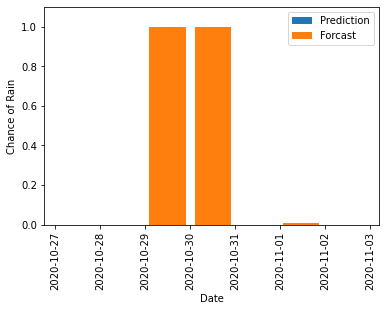

In [4]:
fig = plt.figure()
plt.bar(df['date'].iloc[6:], preds, label='Prediction')
plt.bar(df['date'].iloc[6:], df['pop'].tail(7), label='Forcast')
plt.ylim(0,1.1)
plt.xlabel('Date')
plt.ylabel('Chance of Rain')
plt.xticks(rotation=90)
plt.legend()

In [5]:
df.columns

Index(['date', 'sunrise', 'sunset', 'temp_avg', 'feels_like', 'press_avg',
       'humid_avg', 'dp_avg', 'uvi', 'clouds', 'ws_avg', 'wind_deg', 'PRCP',
       'pop', 'month', 'temp_kelvin', 'press_delta', 'humid_delta', 'ws_delta',
       'temp_trend', 'humid_trend', 'press_trend', 'SNOW', 'under_dp',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'lat', 'lon', 'distance', 'distance_delta'],
      dtype='object')

In [6]:
proba = model.predict_proba(df[train_cols].dropna())[-7:,1]


In [7]:
df.head()

,date,sunrise,sunset,temp_avg,feels_like,press_avg,humid_avg,dp_avg,uvi,clouds,...,month_7,month_8,month_9,month_10,month_11,month_12,lat,lon,distance,distance_delta
4,2020-10-21 15:43:51,1603278886,1603318041,70.38,72.10,30.212640,77,62.83,3.19,40,...,0,0,0,1,1,0,-9999,-9999,-9999,-9999
3,2020-10-22 15:43:51,1603365354,1603404356,68.04,68.90,30.212640,77,60.57,3.17,90,...,0,0,0,1,1,0,-9999,-9999,-9999,-9999
2,2020-10-23 15:43:51,1603451822,1603490672,66.15,67.73,30.124040,88,62.49,3.25,90,...,0,0,0,1,1,0,-9999,-9999,-9999,-9999
1,2020-10-24 15:43:51,1603538290,1603576990,68.61,62.35,29.887773,52,50.31,3.24,75,...,0,0,0,1,1,0,-9999,-9999,-9999,-9999
0,2020-10-25 15:43:51,1603624759,1603663308,51.46,42.31,30.242174,50,33.46,3.10,75,...,0,0,0,1,1,0,-9999,-9999,-9999,-9999


In [8]:
df.date=df.date.map(lambda x: x.day_name())

In [9]:
df2 = pd.DataFrame(zip(df['date'].iloc[6:], proba))

In [10]:
df3 = pd.DataFrame()
for each in models:
    curr_df = pd.DataFrame(zip(df['date'].iloc[6:], models[each].predict_proba(df[train_cols].dropna())[-7:,1]), columns=['Date', 'Probability'])
    curr_df['Model'] = each
    df3 = df3.append(curr_df, ignore_index=True)


In [11]:
df3.head(10)

,Date,Probability,Model
0,Tuesday,0.398620,Voting
1,Wednesday,0.415906,Voting
2,Thursday,0.625449,Voting
3,Friday,0.550657,Voting
4,Saturday,0.425132,Voting
5,Sunday,0.431754,Voting
6,Monday,0.371621,Voting
7,Tuesday,0.882353,KNearestNeighbors
8,Wednesday,0.941176,KNearestNeighbors
9,Thursday,0.588235,KNearestNeighbors


(0.0, 1.1)

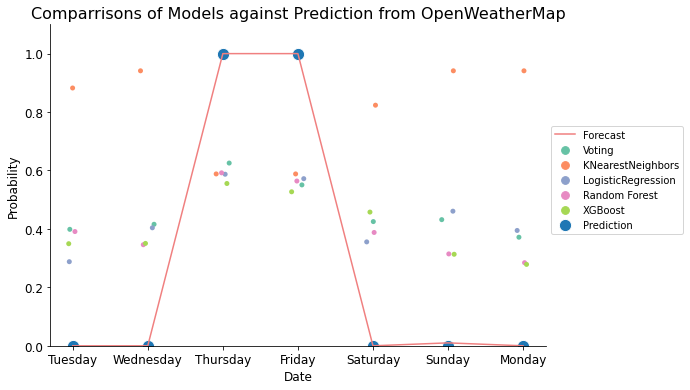

In [12]:
fig = sns.catplot(x='Date', y='Probability', data=df3, kind='strip', hue='Model', legend=False, palette='Set2', height=5, aspect=1.5)
plt.plot(df['date'].iloc[6:], df['pop'].tail(7), label='Forecast', color='lightcoral')
sns.scatterplot(df['date'].iloc[6:], preds, label='Prediction', marker='o', s=150)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Comparrisons of Models against Prediction from OpenWeatherMap', fontsize=16)
plt.legend(bbox_to_anchor=(1,0.7))
plt.ylim((0,1.1))


In [14]:
plt.show(fig)

In [15]:
plt.show(fig)

In [ ]:
df3 = df2.copy(deep=True)
for row in df2.index:
    day, curr_proba = df2.iloc[row]
    curr_df = pd.DataFrame(zip(100*[day], curr_proba*np.random.random(100)), columns=['date', 'probability'])
    df3 = df3.append(curr_df, ignore_index=True)

In [64]:
[each for each in models]

['Voting',
 'KNearestNeighbors',
 'LogisticRegression',
 'Random Forest',
 'XGBoost']

In [13]:
df2.isnull().sum()

date           0
probability    0
dtype: int64

In [21]:
from datetime import timedelta
import matplotlib.patches as patches

In [38]:
proba

0.651366350969392

In [18]:
plt.Rectangle(xy=(1,2), width=2, height=2)

In [16]:
df.columns

Index(['date', 'sunrise', 'sunset', 'temp_avg', 'feels_like', 'press_avg',
       'humid_avg', 'dp_avg', 'uvi', 'clouds', 'ws_avg', 'wind_deg',
       'wind_gust', 'pop', 'PRCP', 'month', 'temp_kelvin', 'press_delta',
       'humid_delta', 'ws_delta', 'temp_trend', 'humid_trend', 'press_trend',
       'SNOW', 'under_dp', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'lat', 'lon', 'distance', 'distance_delta'],
      dtype='object')